In [4]:
import selenium as se
from selenium import webdriver
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from selenium.webdriver.common.by import By

In [11]:
driver = webdriver.Firefox()
driver.get("https://www.polsl.pl/rms/wydzial/pracownicy/")
# print(driver.page_source)

In [6]:
# driver.execute_script("window.scrollTo(0, document.slimScrollDiv.scrollHeight);")

In [ ]:
# employeeList = driver.find_element(By.CLASS_NAME, "slimScrollDiv")
# employeeList = driver.find_element(By.CSS_SELECTOR, '[data-id="a377500"]')

# lista pracowników
employeeList = driver.find_element(By.CLASS_NAME, "employee-list")
rows = employeeList.find_elements(By.CLASS_NAME, "mn-list-container-row")
employeeData = []

print(len(rows))

for row in rows:
    # wyciągnięcie ich danych
    # name = row.find_element(By.CLASS_NAME, "mn-list-container-item").get_attribute("innerText")
    cols = row.find_elements(By.XPATH, ".//div[@class='mn-list-container-item']")
    name = cols[0].get_attribute("innerText")
    positions = cols[1].find_elements(By.XPATH, ".//ul//li")
    positions = [position.get_attribute("innerText") for position in positions]
    
    employeeData.append([name, positions])

63


In [ ]:
# df = pd.DataFrame(employeeData, columns=["Imie Nazwisko", "Stanowisko"])
# df.to_csv('dane_63.csv', index=False)

In [8]:
df = pd.DataFrame(employeeData, columns=['Imie i Nazwisko', 'Stanowisko'])
df = df.explode('Stanowisko').reset_index(drop=True)
# print(df.head(40))

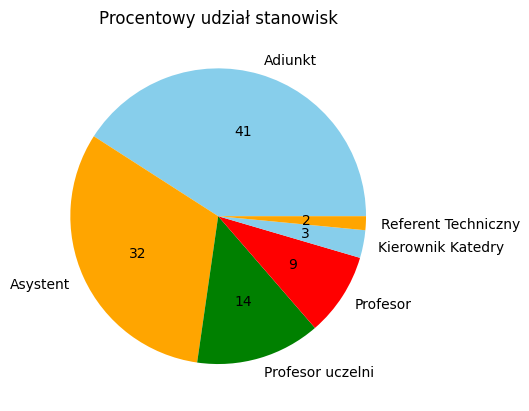

In [9]:
df['Stanowisko'] = df['Stanowisko'].str.replace(r'\s*\(.*?\)', '', regex=True)
stanowiskaCount = df['Stanowisko'].value_counts()

stanowiskaCount.plot(kind='pie', autopct='%1.0f', colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Procentowy udział stanowisk')
plt.ylabel('')
plt.show()
